In [3]:
from IPython.display import *

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

from eralchemy import render_er


In [4]:
from sqlalchemy import MetaData, Table, create_engine
metadata = MetaData()
engine = create_engine('sqlite:///Chinook_Sqlite.sqlite')

In [5]:
artist = Table('artist', metadata, autoload=True, autoload_with=engine)

In [6]:
album = Table('album', metadata, autoload=True, autoload_with=engine)

In [7]:
artist.columns.keys()

['ArtistId', 'Name']

In [9]:
from sqlalchemy import select
s = select([artist]).limit(10)
# engine.execute(s).fetchall()
pd.read_sql_query(s, engine)

,ArtistId,Name
0,1,AC/DC
1,2,Accept
2,3,Aerosmith
3,4,Alanis Morissette
4,5,Alice In Chains
5,6,Antônio Carlos Jobim
6,7,Apocalyptica
7,8,Audioslave
8,9,BackBeat
9,10,Billy Cobham


In [12]:
album.foreign_keys

{ForeignKey('artist.ArtistId')}

In [11]:
from sqlalchemy import ForeignKeyConstraint
album.append_constraint(
    ForeignKeyConstraint(['ArtistId'], ['artist.ArtistId'])
)

In [12]:
album.foreign_keys

{ForeignKey('artist.ArtistId')}

In [13]:
metadata.tables['album']

Table('album', MetaData(bind=None), Column('AlbumId', INTEGER(), table=<album>, primary_key=True, nullable=False), Column('Title', NVARCHAR(length=160), table=<album>, nullable=False), Column('ArtistId', INTEGER(), ForeignKey('artist.ArtistId'), table=<album>, nullable=False), schema=None)

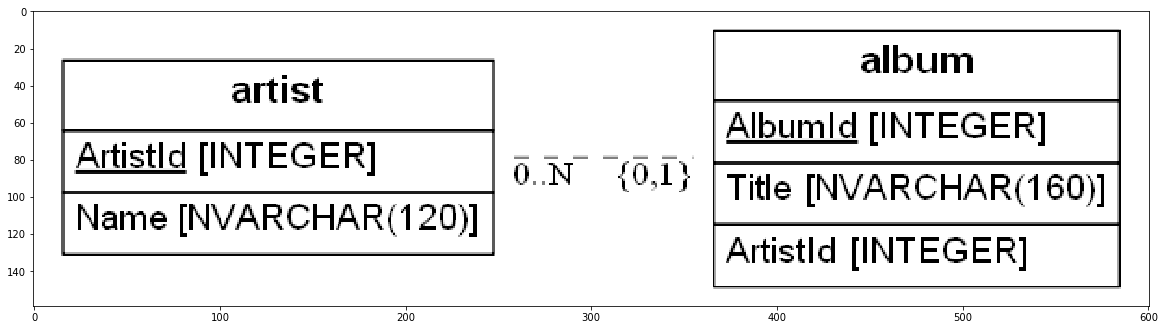

In [15]:
filename = 'mymodel.png'
render_er(metadata, filename)
imgplot = plt.imshow(mpimg.imread(filename))
plt.rcParams["figure.figsize"] = (20,20)
plt.show()

In [16]:
str(artist.join(album))

'artist JOIN album ON artist."ArtistId" = album."ArtistId"'

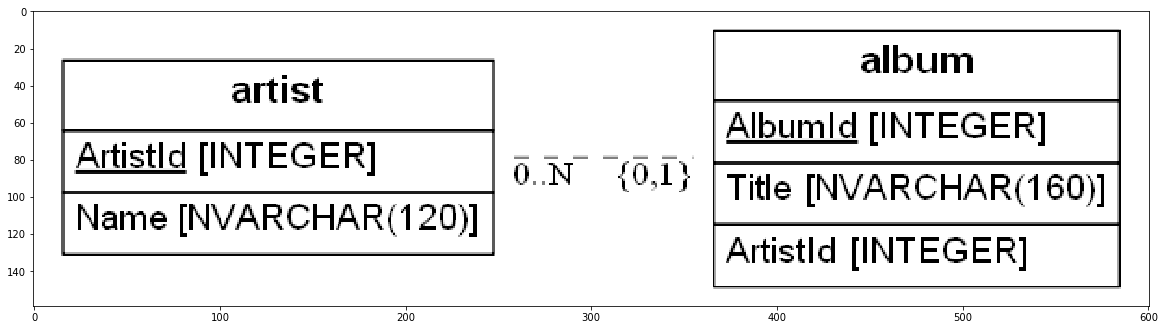

In [17]:
filename = 'mymodel.png'
render_er(metadata, filename)
imgplot = plt.imshow(mpimg.imread(filename))
plt.rcParams["figure.figsize"] = (20,20)
plt.show()

In [18]:
metadata.reflect(bind=engine)

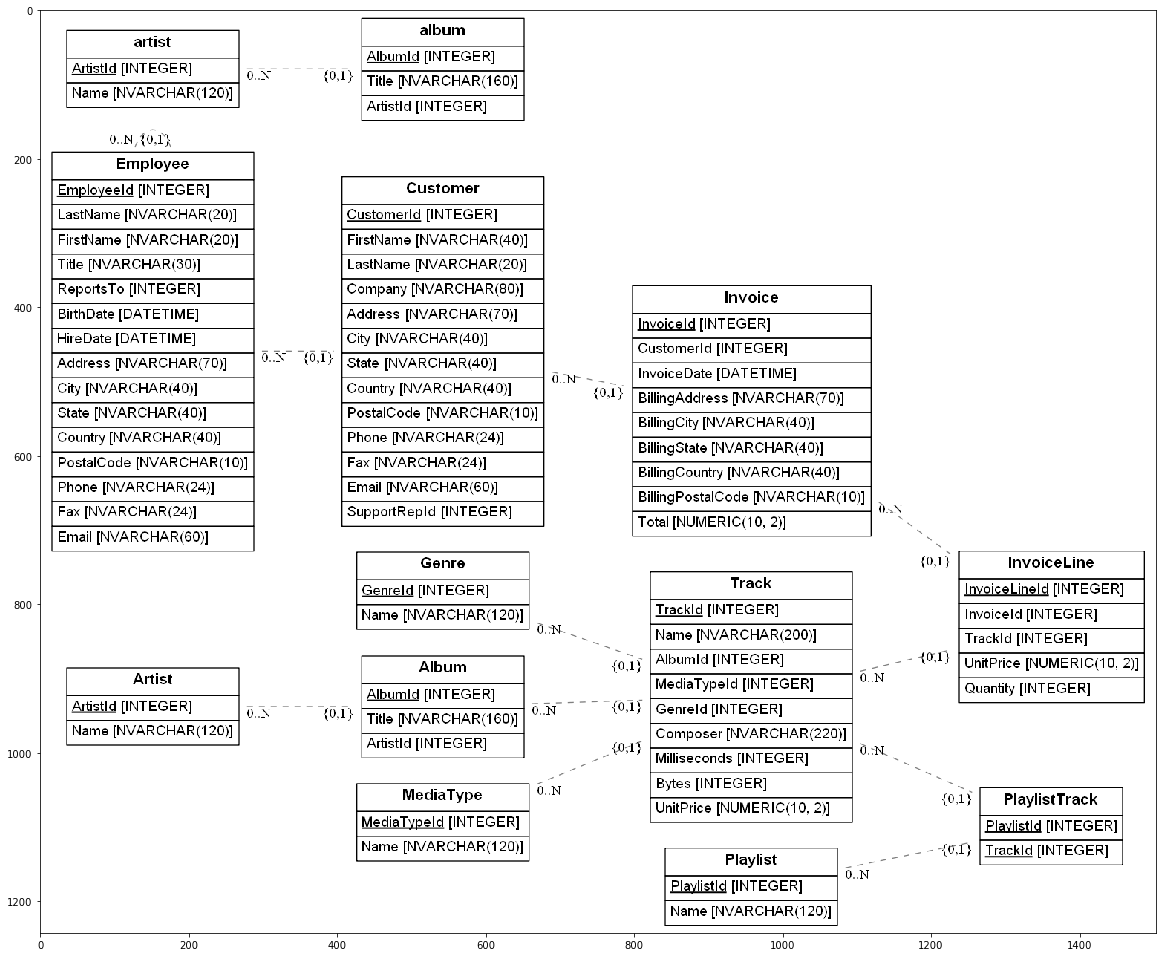

In [19]:
filename = 'mymodel.png'
render_er(metadata, filename)
imgplot = plt.imshow(mpimg.imread(filename))
plt.rcParams["figure.figsize"] = (20,20)
plt.show()

In [20]:
metadata.tables.keys()

dict_keys(['Track', 'Customer', 'album', 'Employee', 'Artist', 'MediaType', 'InvoiceLine', 'Album', 'Invoice', 'Playlist', 'PlaylistTrack', 'artist', 'Genre'])

In [21]:
playlist = metadata.tables['Playlist']

In [22]:
from sqlalchemy import select
s = select([playlist]).limit(10)
# engine.execute(s).fetchall()
pd.read_sql_query(s, engine)

,PlaylistId,Name
0,1,Music
1,2,Movies
2,3,TV Shows
3,4,Audiobooks
4,5,90’s Music
5,6,Audiobooks
6,7,Movies
7,8,Music
8,9,Music Videos
9,10,TV Shows
